## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import pickle
from keras.models import model_from_json


%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings("ignore")
from fatsecret import Fatsecret
fs = Fatsecret('d82e5cd4d5674be99e298020286a1bd5', '823bef07377d4560ba7c3fa4a5c0b521')
from sklearn.externals import joblib

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
categories = pd.read_csv('category.csv',index_col=['Unnamed: 0'])

## SVM Prediction function

In [3]:
svm = joblib.load('model.pkl')
def svm_predict(path,model):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    test_image = image.load_img(path,target_size=(128,128))
    test_image = np.array(test_image)
    test_image = test_image.flatten()
    test_image = test_image.reshape(1,-1)
    index = model.predict(test_image/255)
    print('Predicted Category: ',categories.iloc[index[0],0],'\n')
    foods = fs.foods_search(categories.iloc[index,0])
    print(foods[0]['food_description'])

## CNN Prediction function

In [4]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn = model_from_json(loaded_model_json)
# load weights into new model
cnn.load_weights("model.h5") 
cnn.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])

def cnn_predict(path,model):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    test_image = image.load_img(path,target_size=(128,128))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    index = np.argmax(model.predict(test_image))
    print(index)
    print('Predicted Category: ',categories.iloc[index,0],'\n')
    foods = fs.foods_search(categories.iloc[index,0])
    print(foods[0]['food_description'])

## Prediction

In [5]:
#Prediction
path = "valid/CIRFOOD-821_Pasta with meat sauce/Pasta al ragЧ_298.jpg"

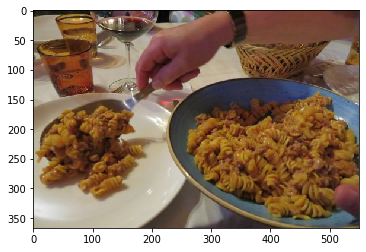

Predicted Category:  Pasta with meat sauce 

Per 1274g - Calories: 1643kcal | Fat: 65.23g | Carbs: 166.51g | Protein: 101.03g


In [6]:
#SVM
svm_predict(path,svm)

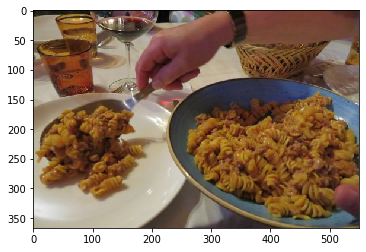

4
Predicted Category:  Chicken breast in the Valle d'Aosta style 

Per 101g - Calories: 197kcal | Fat: 7.79g | Carbs: 0.00g | Protein: 29.80g


In [7]:
#CNN
cnn_predict(path,cnn)